<font color=blue>TITLE:</font> HANDWRITTEN DIGIT CLASSIFIER
    
<font color=blue>DESCRIPTION:</font>
In this Notebook various methods for classifying handwritten digits will be evaluated:

- K nearest neighbor classification with 4 folds
- Neural network with 1, 2, and 3 hidden layers

In [1]:
# import needed libraries, including dataset in sci-kit learn
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.DataFrame(load_digits()['data'])
target = pd.DataFrame(load_digits()['target'])
df = pd.merge(left = data, right = target, left_index = True, right_index = True)

In [3]:
df.head(1)

,0_x,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,0_y
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0


In [4]:
df.rename(mapper = {"0_x": "0", "0_y": "target"}, axis = 1, inplace = True )

In [5]:
#practice on an image from the load_digits file
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

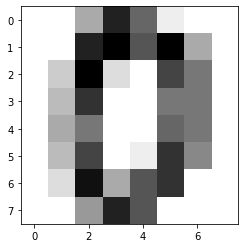

In [6]:
#practice (cont.)
plt.imshow(np_image, cmap = 'gray_r')
plt.show()

In [7]:
#List of image arrays to display

rows = [0,100,200,300,1000,1200,1300,1400]
images= []
for r in rows:
    raw_image = data.iloc[r]
    image = raw_image.values
    image = image.reshape(8,8)
    images.append(image)

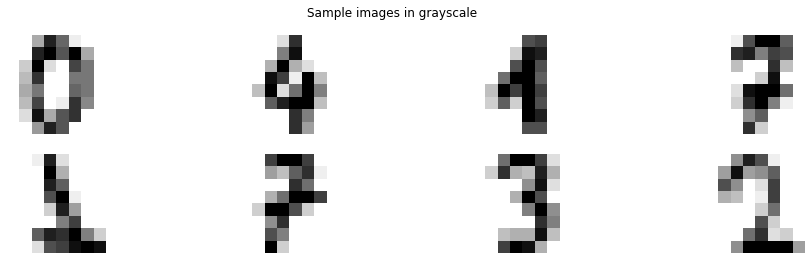

In [8]:
#Display the images corresponding to rows 0, 100, 200, 300 then 1000,1200,1300,1400
fig,((ax1,ax2,ax3,ax4), (ax5,ax6,ax7,ax8)) = plt.subplots(figsize=(16,4),nrows = 2, ncols = 4)

#fig,axs = plt.subplots(figsize=(16,4),nrows = 2, ncols = 4,)
fig.suptitle("Sample images in grayscale")
#axs[0].imshow(images[0], cmap = 'gray_r')
ax1.imshow(images[0], cmap = 'gray_r')
ax2.imshow(images[1], cmap = 'gray_r')
ax3.imshow(images[2], cmap = 'gray_r')
ax4.imshow(images[3], cmap = 'gray_r')
ax5.imshow(images[4], cmap = 'gray_r')
ax6.imshow(images[5], cmap = 'gray_r')
ax7.imshow(images[6], cmap = 'gray_r')
ax8.imshow(images[7], cmap = 'gray_r')

#turn off axes (can't understand why for loop didn't work for this)
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")
ax6.axis("off")
ax7.axis("off")
ax8.axis("off")

plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn import metrics
#Remember: the scale for feature values is 0 - 16, not 0 -1
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(data, target,test_size = .25, shuffle = True)

In [10]:
# knn 1 neighbor classification
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_features1,train_labels1.values.ravel())
predictions1 = knn.predict(test_features1)
tls1 = test_labels1.to_numpy().ravel()
sk_error = metrics.accuracy_score(test_labels1, predictions1)

print("SKlearn accuracy probability, KNearestNeighbor, n = 1: {: .3f}".format(sk_error))

SKlearn accuracy probability, KNearestNeighbor, n = 1:  0.989


In [11]:
# n_neighbors 1 through 10

knn_no_fold = [0.989, 0.980, 0.987, .980, 0.980, .978, .978, .980, .980, .978]  

In [12]:
## Expand knn 1 neighbor classification to 4 KFold

kf4 = KFold(n_splits = 4)
knn4 = KNeighborsClassifier(n_neighbors = 1)
fold_accuracies = []
for train_index, test_index in kf4.split(data):
    train_features4 = data.loc[train_index]
    test_features4 = data.loc[test_index]
    train_labels4 = target.loc[train_index]
    test_labels4 = target.loc[test_index]
    knn4.fit(train_features4,train_labels4.to_numpy().ravel())
    predictions4 = knn4.predict(test_features4)
    kftl4 = test_labels4.to_numpy().ravel()
    error4 = metrics.accuracy_score(test_labels4, predictions4)
    fold_accuracies.append(error4)
print("KFold 4 prediction accuracy",fold_accuracies)
print("Avg KFold 4 prediction accuracy: {: .3f}".format(sum(fold_accuracies)/len(fold_accuracies)))

KFold 4 prediction accuracy [0.9688888888888889, 0.9599109131403119, 0.9799554565701559, 0.9621380846325167]
Avg KFold 4 prediction accuracy:  0.968


In [13]:
# 4 folds in KFoldvalues for n_neighbors 1 through 10 (for checking loop below)

knn4_fold = [0.968,0.962,0.963, 0.965, 0.962,0.959, 0.957, 0.957, 0.954, 0.953]


In [14]:
# Try various neighbor values(k)

k_values = list(range(1,11))
overall_acc = []
for k in k_values:
    kfo = KFold(n_splits = 4)
    knno = KNeighborsClassifier(n_neighbors = k)
    fold_accuracies = []
    for train_index, test_index in kfo.split(data):
        train_featureso = data.loc[train_index]
        test_featureso = data.loc[test_index]
        train_labelso = target.loc[train_index]
        test_labelso = target.loc[test_index]
        knno.fit(train_featureso,train_labelso.to_numpy().ravel())
        predictionso = knno.predict(test_featureso)
        kflo = test_labelso.to_numpy().ravel()
        erroro = metrics.accuracy_score(test_labelso, predictionso)
        fold_accuracies.append(erroro)
    avg_fold_accuracies = sum(fold_accuracies)/len(fold_accuracies)
    overall_acc.append(avg_fold_accuracies)  

print(overall_acc)

[0.9677233358079684, 0.9616010888393962, 0.9627183865379857, 0.9649480326651819, 0.9621665429349171, 0.9588270230141054, 0.9571591190299431, 0.9571578817124474, 0.9543801039346697, 0.9527097253155159]


Loop functioning properly.  These 10 values same (within roundoff error) as values in the check cell
<br><br><br>

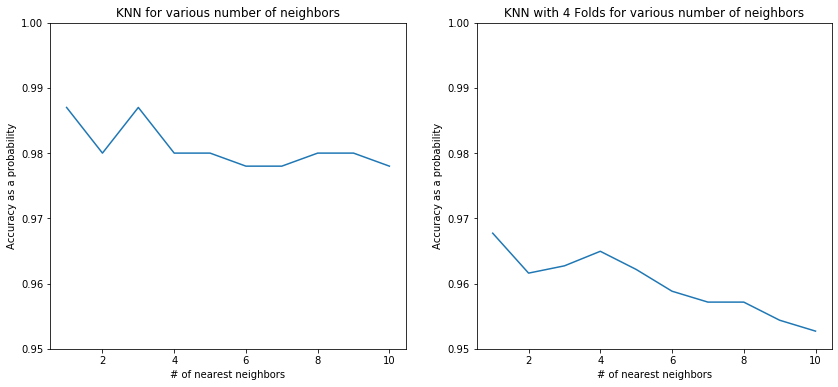

In [15]:
#plot the KNN results
fig = plt.figure(figsize= (14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(k_values, knn_no_fold)
ax1.set_title("KNN for various number of neighbors")
ax1.set_xlabel("# of nearest neighbors")
ax1.set_ylabel("Accuracy as a probability")
ax1.set_ylim(.95,1)

ax2.plot(k_values, overall_acc)
ax2.set_title("KNN with 4 Folds for various number of neighbors")
ax2.set_xlabel("# of nearest neighbors")
ax2.set_ylabel("Accuracy as a probability")
ax2.set_ylim(.95,1)

plt.show()


<font color=blue>NOTE</font>
<br>
I do not understand how the KFold KNN was *less* accurate than KNN. Literature says it should be *more* accurate. Maybe due to the random shuffle?  The difference in accuracy due to random chance? Is there overfitting or underfitting? Data leakage?  Did I miss something?
<br><br><br>

Perform the analysis with a Neural Network model using different numbers of hidden layers and different numbers of neurons per layer:

1 layer: 8,16,32,64,128,256 neurons<br>
2 layer: 64 neurons<br>
3 layer: 10, 64, 128 neurons (6 Folds)

In [16]:
from sklearn.neural_network import MLPClassifier

In [17]:
#train,test, cross_validate nn 

neurons = [10,64,128]
nn_dict = {}
overall_acc = []
k = 0
for n in neurons:
    fold_mlp = KFold(n_splits = 6) #modify for last run
    mlp = MLPClassifier(hidden_layer_sizes = (n,n,n), max_iter = 2000) #modify as needed
    fold_accuracies = []
    for train_index, test_index in fold_mlp.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        train_labels = target.loc[train_index]
        test_labels = target.loc[test_index]
        mlp.fit(train_features,train_labels.to_numpy().ravel())
        prediction = mlp.predict(test_features)
        error = metrics.accuracy_score(test_labels, prediction)
        fold_accuracies.append(error)
    avg_fold_accuracies = sum(fold_accuracies)/len(fold_accuracies)
    overall_acc.append(avg_fold_accuracies)  
    nn_dict[k] = ({'3 hidden layers':{'neurons': n, 'accuracy': avg_fold_accuracies}}) #modify for each run
    k+=1

In [18]:
#dictionary of # of hidden layers, neurons, accuracy
nn_dict

{0: {'3 hidden layers': {'neurons': 10, 'accuracy': 0.8981791155704201}},
 1: {'3 hidden layers': {'neurons': 64, 'accuracy': 0.9438052768487551}},
 2: {'3 hidden layers': {'neurons': 128, 'accuracy': 0.9554849498327759}}}

<font color=blue>RESULTS OF NN ANALYSIS:</font><br>

**1 layer: [8,16,32,64,128,256] neurons** - 
{0: {'1 hidden layer': {'neurons': 8, 'accuracy': 0.9098490472655284}}<br>
 1: {'1 hidden layer': {'neurons': 16, 'accuracy': 0.9359910913140311}}<br>
 2: {'1 hidden layer': {'neurons': 32, 'accuracy': 0.9337663944568176}}<br>
 3: {'1 hidden layer': {'neurons': 64, 'accuracy': 0.9410133630289532}}<br>
 4: {'1 hidden layer': {'neurons': 128, 'accuracy': 0.9387775303142787}}<br>
 5: {'1 hidden layer': {'neurons': 256, 'accuracy': 0.9465701559020044}}}<br>

**2 layer: 64 neurons** - <br>
{0: {'2 hidden layers': {'neurons': 64, 'accuracy': 0.9421195248700817}}}

**3 layer: [10, 64, 128] neurons (6 Folds)** -<br>
{0: {'3 hidden layers': {'neurons': 10, 'accuracy': 0.8981791155704201}}<br>
 1: {'3 hidden layers': {'neurons': 64, 'accuracy': 0.9438052768487551}}<br>
 2: {'3 hidden layers': {'neurons': 128, 'accuracy': 0.9554849498327759}}}

<font color=blue>CONCLUSIONS:</font><br>

- KNN provided greater overall prediction accuracy than KNN with 4 folds
- KNN accuracy was less affected by by # of neighbors than KNN with 4 folds.
- When using a Neural Network, there is a difference in accuracy when 8 or 10 neurons are used in the network compared to >16, regardless of the number of hidden layers.
- KNN was superior in digit classification accuracy than a Neural Network